<a href="https://colab.research.google.com/github/suryareddy1376/DeepLearning/blob/main/Fashion_MSINT_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Modules

In [22]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Initializing the seeds of different random numbers

In [23]:
keras.utils.set_random_seed(42)

## Data Collection and preprocessing

In [24]:
# Collecting data from Keras Datasets and it's already preprocessed for practice
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()


In [25]:
labels = ['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

#Visualization Functions

In [26]:
# Let's create the Functions for plotting the Validation error and accuracy curves

def plot_val_los(history):
  plt.clf()
  history_dict = history.history
  loss = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1,len(val_loss_values)+1)
  plt.plot(epochs,loss,"ro",label = "Training Loss")
  plt.plot(epochs,val_loss_values,"b",label = "Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()


def plot_acc_los(history):
  plt.clf()
  history_dict = history.history
  accuracy = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1,len(accuracy)+1)
  plt.plot(epochs,accuracy,"ro",label = "Training accuracy")
  plt.plot(epochs,val_acc,"b",label = "Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()



# A Covultion Neural Network

## Data Prep

In [27]:
# Let's Normalize
x_train = x_train/255.0
x_test = x_test/255

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

##Define a Model

### Let's create the first Convulutional Neural Network(CNN)

In [31]:
# input layer
input = keras.Input(x_train.shape[1:])

# 1st Convulutional block
# open of convulutional layer
x = keras.layers.Conv2D(32,kernel_size=(2,2),activation="relu",name = "Conv_1")(input)
# Max pooling layer
x = keras.layers.MaxPool2D()(x)
# Closing of 1st convulutional block

# 2nd Conculutional layer
x = keras.layers.Conv2D(32,kernel_size=(2,2),activation="relu",name = "Conv_2")(x)
# Max Pool layer
x = keras.layers.MaxPool2D()(x)
# Closing of 2nd Convulutional Block

# Flatten the layer
x = keras.layers.Flatten()(x)


# connect it to the dense layer(fully connected)
x = keras.layers.Dense(256,activation="relu")(x)

# Output Softmax Layer
output = keras.layers.Dense(10,activation="softmax")(x)

model = keras.Model(input,output)


In [32]:
# Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,026 (1.15 MB)

 Trainable params: 302,026 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

### Let's Plot the Neural Network

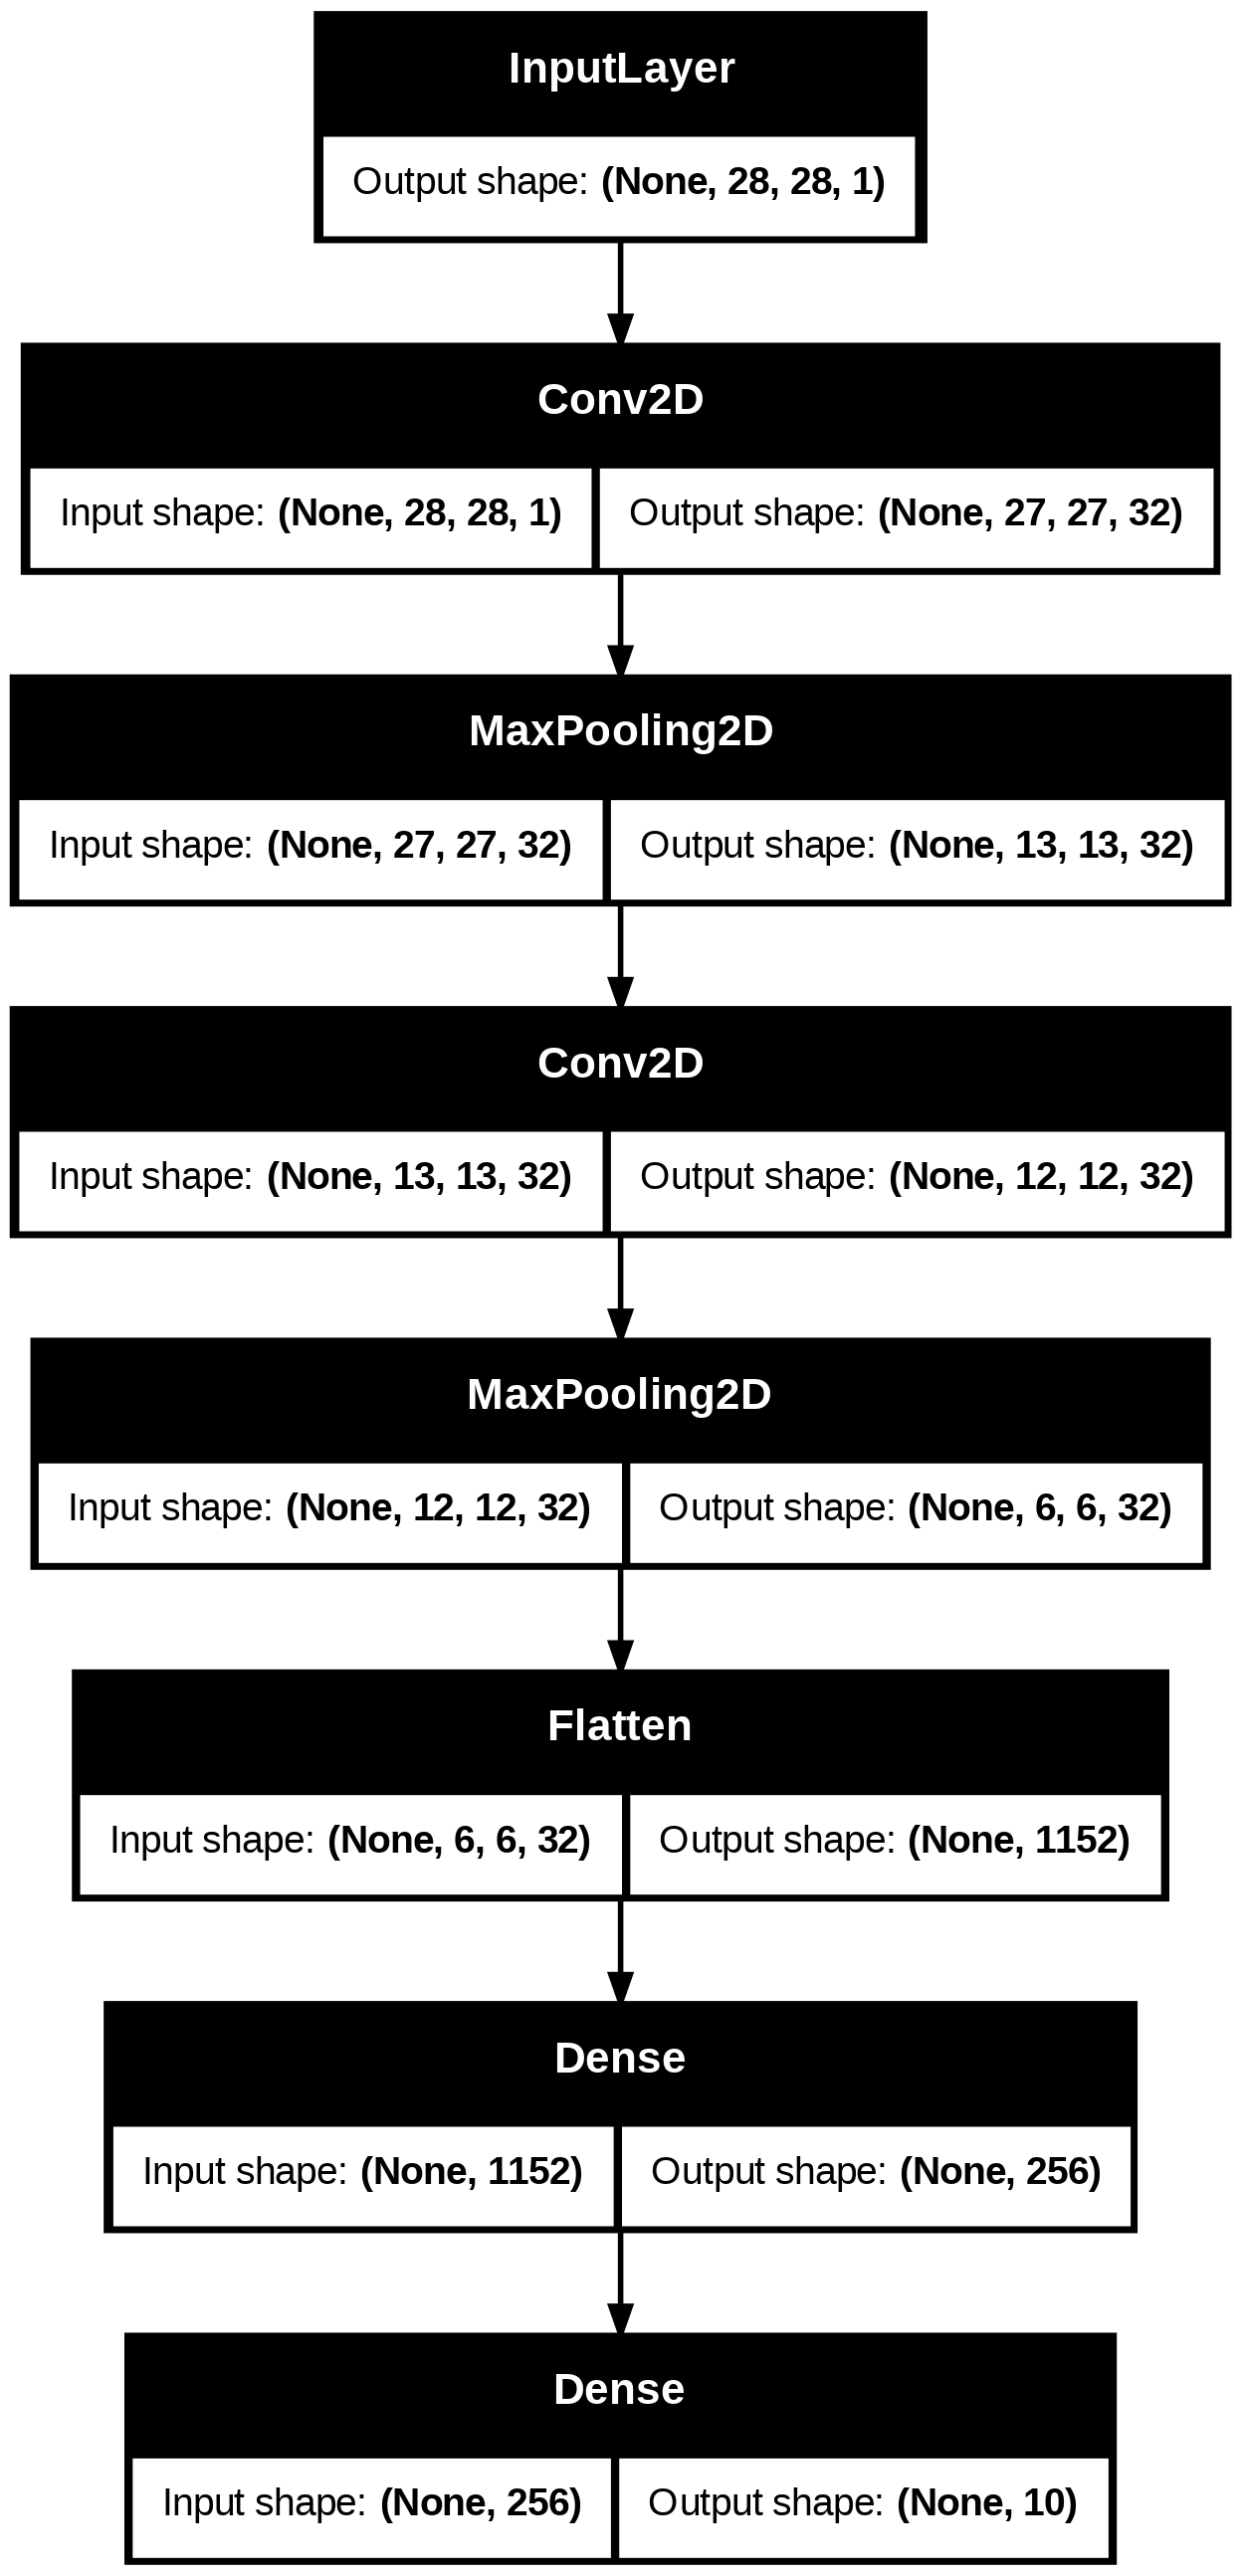

In [33]:
keras.utils.plot_model(model,show_shapes=True)

### Compile the model

In [34]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



### Train the Model

In [35]:
history = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7478 - loss: 0.7085 - val_accuracy: 0.8708 - val_loss: 0.3711
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8737 - loss: 0.3574 - val_accuracy: 0.8880 - val_loss: 0.3102
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8924 - loss: 0.3014 - val_accuracy: 0.8959 - val_loss: 0.2819
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9024 - loss: 0.2661 - val_accuracy: 0.9003 - val_loss: 0.2667
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9124 - loss: 0.2392 - val_accuracy: 0.9038 - val_loss: 0.2581
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9204 - loss: 0.2169 - val_accuracy: 0.9053 - val_loss: 0.2585
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9277 - loss: 0.1967 - val_accuracy: 0.9062 - val_loss: 0.2581
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9343 - loss: 0.1775 - val_accuracy: 0.

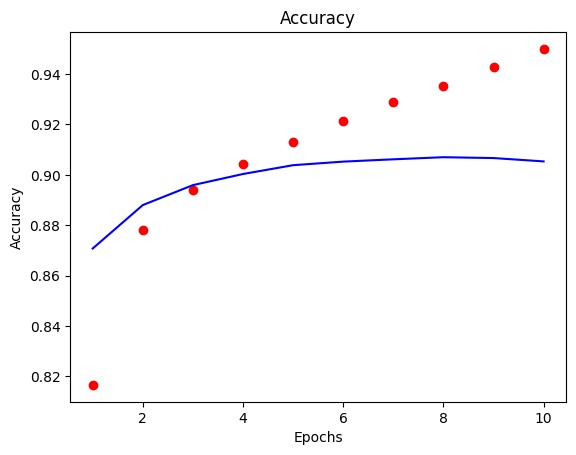

In [36]:
plot_acc_los(history)

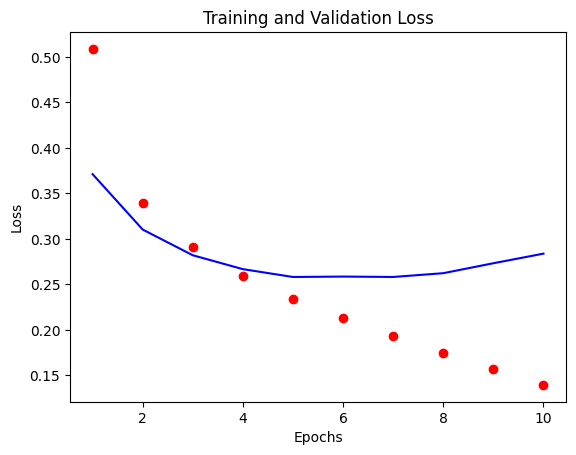

In [37]:
plot_val_los(history)

#Model Evaluation

In [39]:
score = model.evaluate(x_test,y_test)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8989 - loss: 0.3071
Test Loss: 0.2967165410518646
Test Accuracy: 0.8999000191688538
